# ***Room Occupancy Detection***

This Code is an implementation of Room Occupancy Detection Models, the classification goal is to detect whether a room is occupied (Occupied == 1) or not (Occupied == 0)


---
**Data Set Information**


*   Room Occupancy is decided by multiple features (Light, CO2, Temperature,
 and Humidity)
*   There are no missing values and extensixe data preprocessing will not be needed
*   Target Feature (Occupancy) will have to be resampled as there is a significant difference between the binary classes

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Occupancy.csv to Occupancy.csv


# *Loading the necessary libraries and the data set*

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, RocCurveDisplay,
    roc_curve, roc_auc_score, precision_score
)

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Occupancy.csv")

# *Data Exploration, Preproccessing and Visualization*




In [ ]:
df.head()

,ID,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,02/02/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,141,02/02/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,142,02/02/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,143,02/02/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,144,02/02/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2665 non-null   int64  
 1   Date           2665 non-null   object 
 2   Temperature    2665 non-null   float64
 3   Humidity       2665 non-null   float64
 4   Light          2665 non-null   float64
 5   CO2            2665 non-null   float64
 6   HumidityRatio  2665 non-null   float64
 7   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 166.7+ KB


In [ ]:
df.describe()

,ID,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,1472.000000,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,769.463558,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,140.000000,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,806.000000,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,1472.000000,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,2138.000000,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,2804.000000,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [ ]:
df['Occupancy'].value_counts()

,count
Occupancy,
0,1693
1,972


<Axes: ylabel='count'>

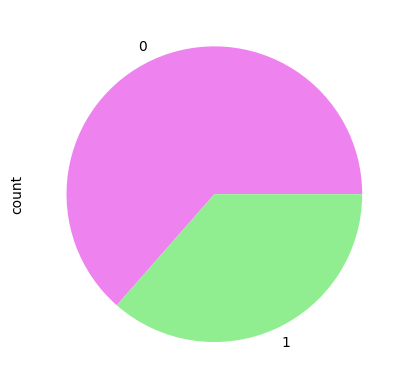

In [ ]:
#check the distribution of the target variable
df['Occupancy'].value_counts().plot(kind='pie', colors=['violet', 'lightgreen'])

In [ ]:
#since the data is clearly imbalanced we have chosen to undersample instead of oversampling, so we will be doing so by removing instances of the majority class (Occupancy ==0 )
df_majority = df[df['Occupancy'] == 0]
df_minority = df[df['Occupancy'] == 1]
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

In [ ]:
#now we will combine minority class with downsampled majority class
df_resampled= pd.concat([df_majority_downsampled, df_minority])

In [ ]:
#count of the data after the balance
df_resampled['Occupancy'].value_counts()

,count
Occupancy,
0,972
1,972


<Axes: ylabel='count'>

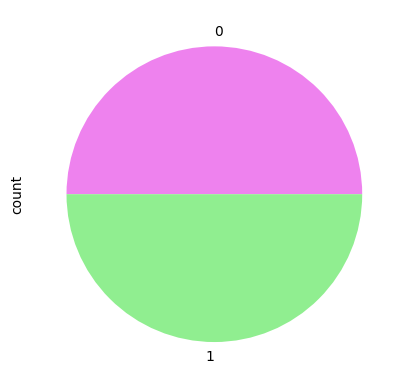

In [ ]:
#verifying the class disturbution
df_resampled['Occupancy'].value_counts().plot(kind='pie', colors=['violet', 'lightgreen'])

In [ ]:
df_resampled.head()

,ID,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2065,2205,04/02/2015 00:43,20.810,24.9560,0.0,541.6,0.003789,0
2537,2677,04/02/2015 08:36,21.000,25.3900,444.0,718.0,0.003901,0
2358,2498,04/02/2015 05:37,20.625,24.4175,0.0,457.5,0.003665,0
1978,2118,03/02/2015 23:17,20.890,25.2000,0.0,561.4,0.003846,0
2176,2316,04/02/2015 02:35,20.700,25.0000,0.0,496.0,0.003770,0


In [ ]:
#dropping unnecessary columns
df_resampled = df_resampled.drop(['ID', 'HumidityRatio', 'Date'], axis=1)

In [ ]:
#Define features and target variables
X= df_resampled.drop ('Occupancy', axis=1)
y= df_resampled['Occupancy']

In [ ]:
round(X.describe(),2)

,Temperature,Humidity,Light,CO2
count,1944.00,1944.00,1944.00,1944.00
mean,21.63,25.74,256.59,778.33
std,1.08,2.52,259.82,307.25
min,20.20,22.10,0.00,427.50
25%,20.70,24.05,0.00,475.67
50%,21.20,25.20,407.58,711.20
75%,22.70,27.56,461.33,1045.35
max,24.41,31.47,1697.25,1402.25


In [ ]:
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
data= df_resampled

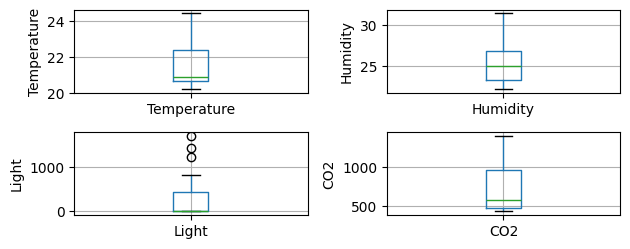

In [ ]:
#Boxplot for each feature
plt.subplot(4,2,1)
fig= df.boxplot(column='Temperature')
fig.set_title('')
fig.set_ylabel('Temperature')

plt.subplot(4,2,2)
fig= df.boxplot(column='Humidity')
fig.set_title('')
fig.set_ylabel('Humidity')

plt.subplot(4,2,3)
fig= df.boxplot(column='Light')
fig.set_title('')
fig.set_ylabel('Light')

plt.subplot(4,2,4)
fig= df.boxplot(column='CO2')
fig.set_title('')
fig.set_ylabel('CO2')

plt.tight_layout()
plt.show()

In [ ]:
#check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Temperature    0
Humidity       0
Light          0
CO2            0
Occupancy      0
dtype: int64


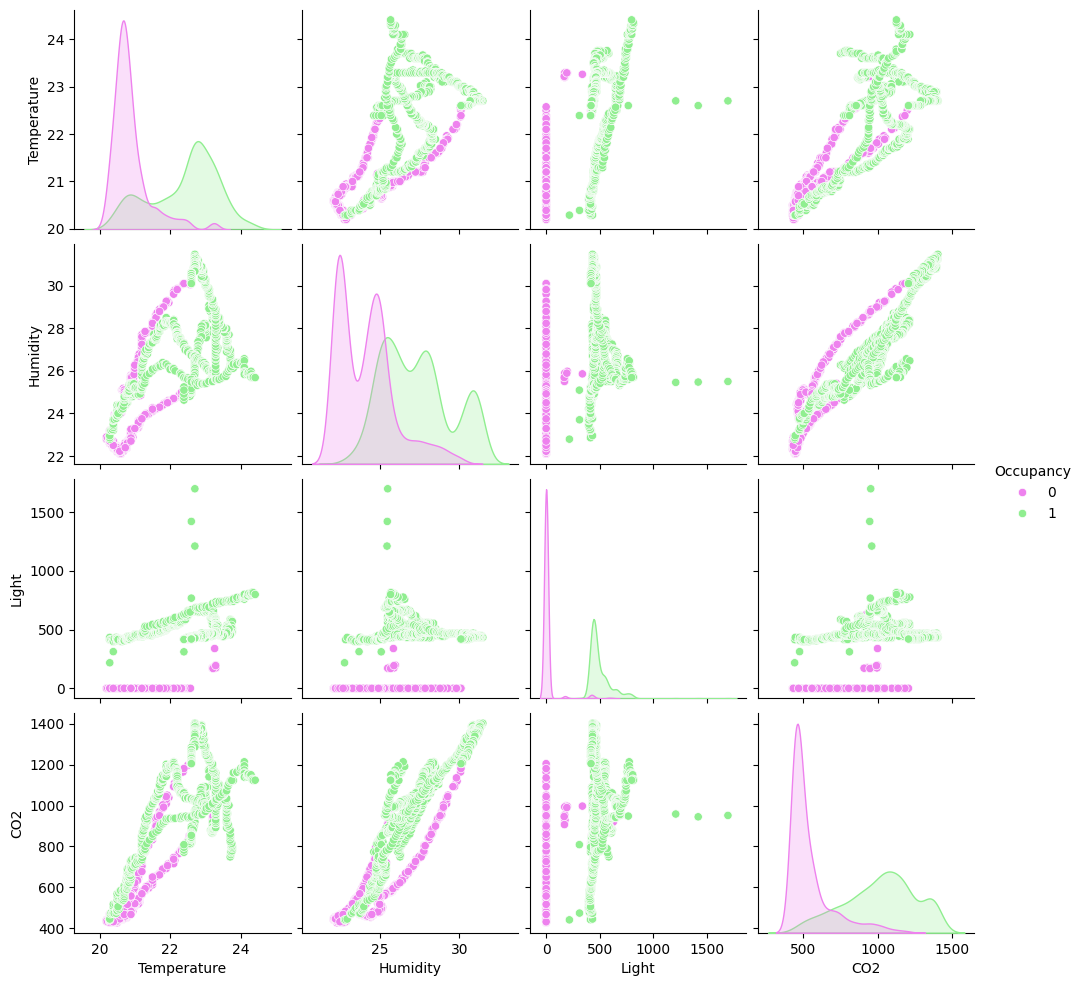

In [ ]:
#Pair plot the features
custom_palette = sns.color_palette(["violet", "lightgreen"])
sns.pairplot(data, hue='Occupancy', palette=custom_palette)
sns.set_style('whitegrid')
plt.show()

<Figure size 1400x800 with 0 Axes>

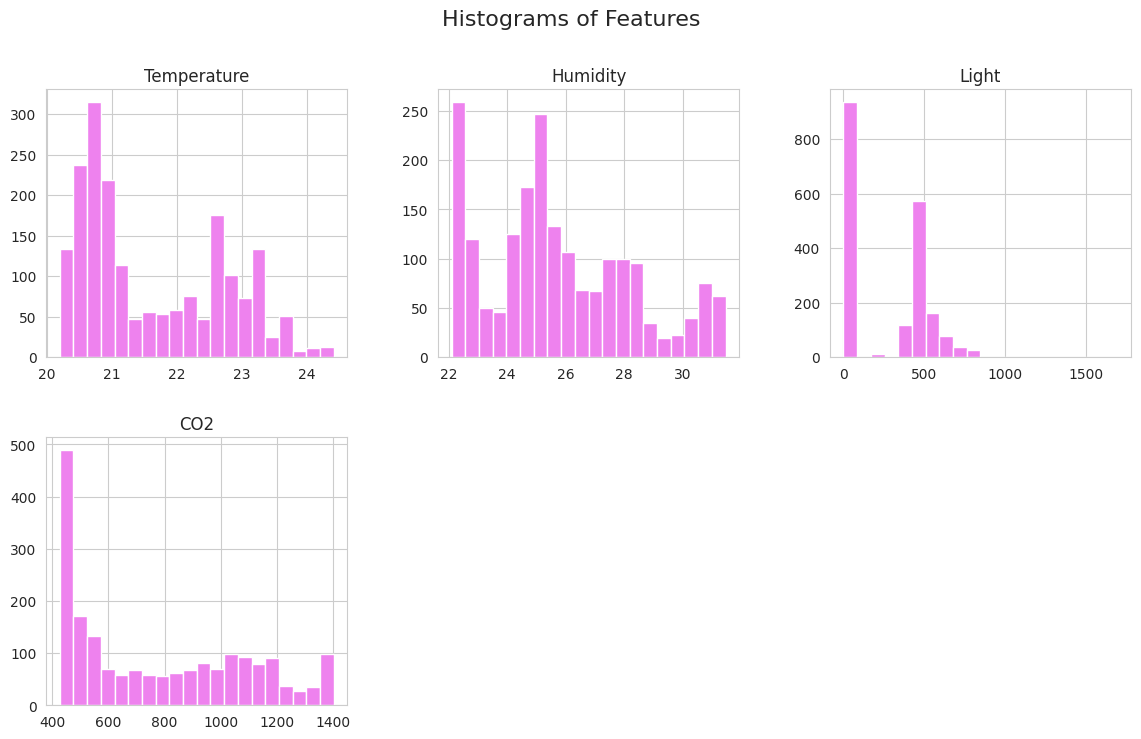

In [ ]:
#Histograms of the features
plt.figure(figsize=(14, 8))
data[['Temperature', 'Humidity', 'Light', 'CO2']].hist(bins=20, figsize=(14, 8), layout=(2, 3),color='violet')
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

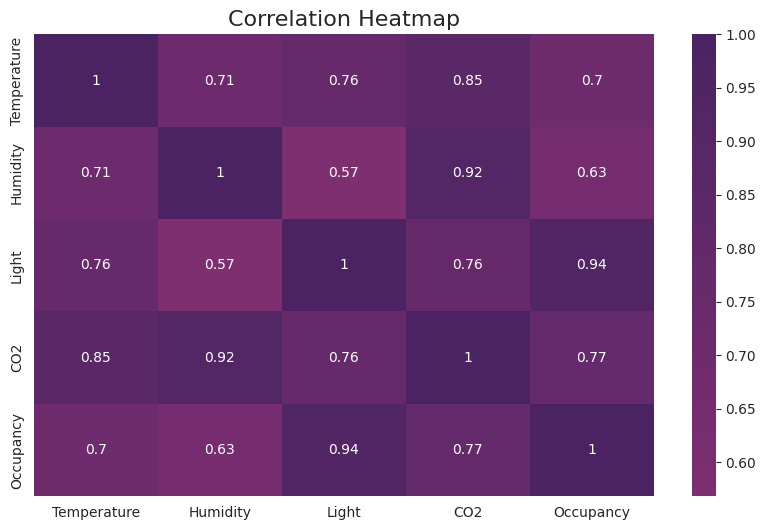

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='flare', center=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# *Classification Using Support Vector Machine*

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [ ]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy}')
print("\nClassification Report: \n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9882525697503671

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       337
           1       0.98      1.00      0.99       344

    accuracy                           0.99       681
   macro avg       0.99      0.99      0.99       681
weighted avg       0.99      0.99      0.99       681


Confusion Matrix: 
 [[329   8]
 [  0 344]]


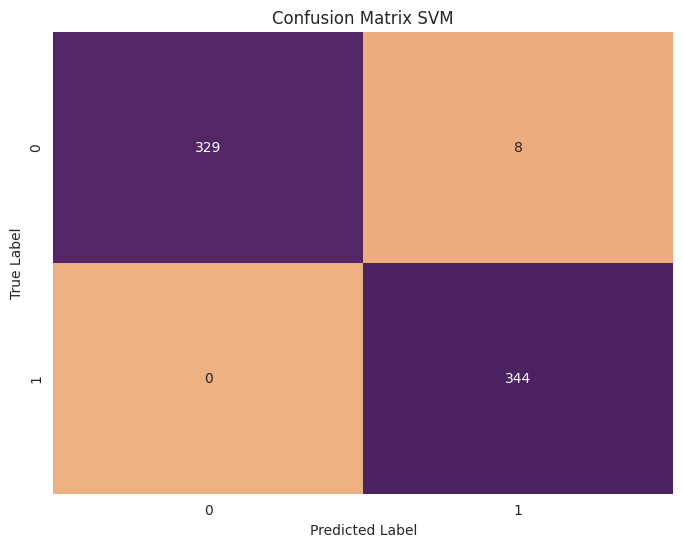

In [ ]:
# Confusion Matrix Visualization
cm_SVM = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVM, annot=True, fmt='d', cmap='flare', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM')
plt.show()

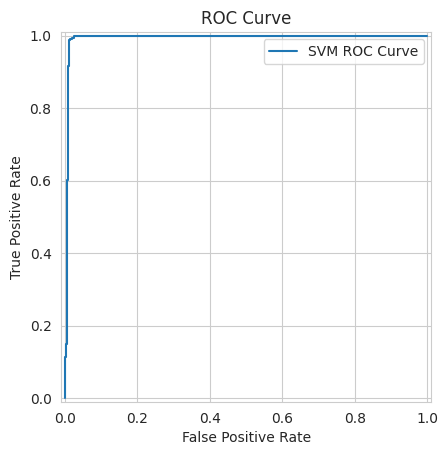

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(label='SVM ROC Curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Print precision and accuracy
precision = precision_score(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Precision:", precision)
print("Accuracy:", accuracy)

Precision: 0.9772727272727273
Accuracy: 0.9882525697503671


# *Classification Using MLP*

In [ ]:
# Split data into training, validation, and test sets
X_vali , X_test , y_vali , y_test, = train_test_split(X_test , y_test, test_size = 0.3 , random_state = 42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
mlp_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input and first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 50
history = mlp_model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4712 - loss: 134.1488 - val_accuracy: 0.1624 - val_loss: 5.6743
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4318 - loss: 5.6920 - val_accuracy: 0.9915 - val_loss: 0.4377
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.8064 - val_accuracy: 0.9915 - val_loss: 0.3065
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.4371 - val_accuracy: 0.9915 - val_loss: 0.2335
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.0703 - val_accuracy: 0.9829 - val_loss: 0.2063
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.2399 - val_accuracy: 0.9915 - val_loss: 0.1967
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.3505 - val_accuracy: 0.9915 - val_loss: 0.1686
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.1180 - val_accuracy: 0.9915 - val_lo

In [ ]:
# Evaluate Deep Learning Model
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
print("MLP Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MLP Model Performance:
Accuracy: 0.9882525697503671

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       337
           1       0.98      1.00      0.99       344

    accuracy                           0.99       681
   macro avg       0.99      0.99      0.99       681
weighted avg       0.99      0.99      0.99       681



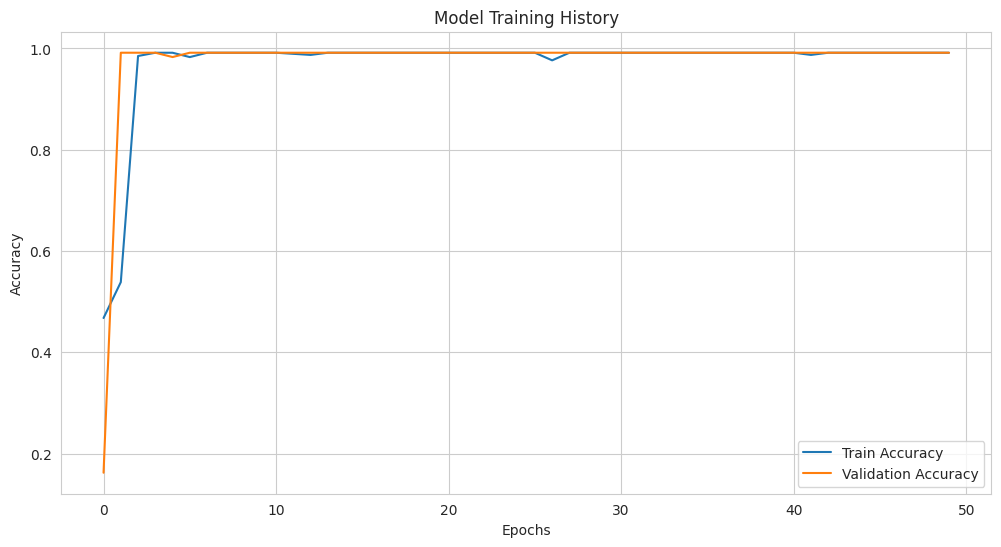

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training History')
plt.show()

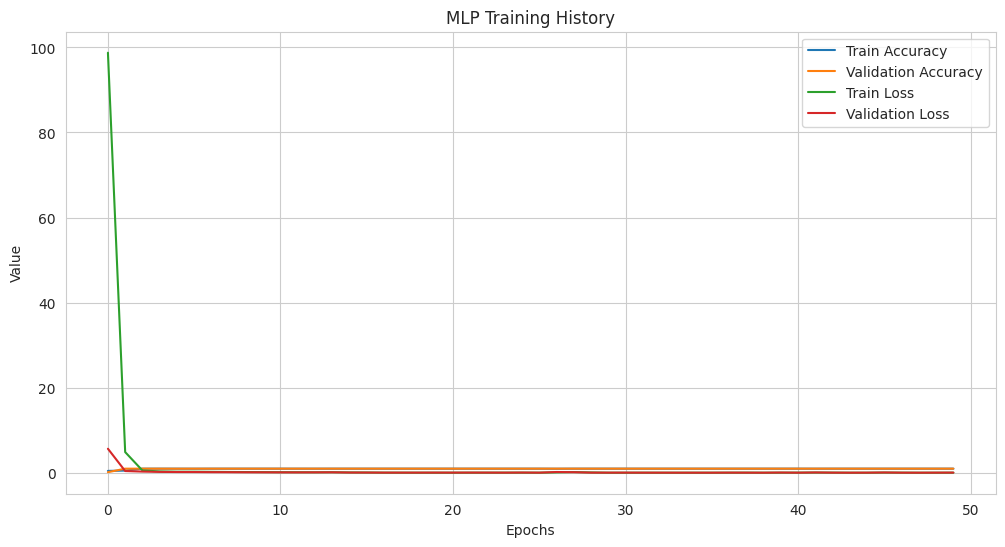

In [ ]:
#training and validation accuracy and loss over epochs.
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("MLP Training History")
plt.legend()
plt.show()


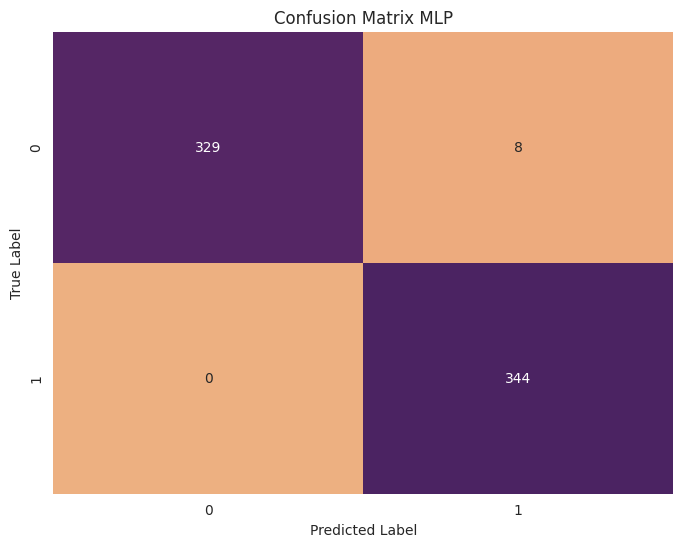

In [ ]:
# Confusion Matrix Visualization
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp , annot=True, fmt='d', cmap='flare', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix MLP')
plt.show()

In [ ]:
# Print precision and accuracy
precision = precision_score(y_test, y_pred_mlp)
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Precision:", precision)
print("Accuracy:", accuracy)

Precision: 0.9772727272727273
Accuracy: 0.9882525697503671


# *Classification Using Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')
print("\nClassification Report: \n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9882525697503671

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       337
           1       0.98      1.00      0.99       344

    accuracy                           0.99       681
   macro avg       0.99      0.99      0.99       681
weighted avg       0.99      0.99      0.99       681



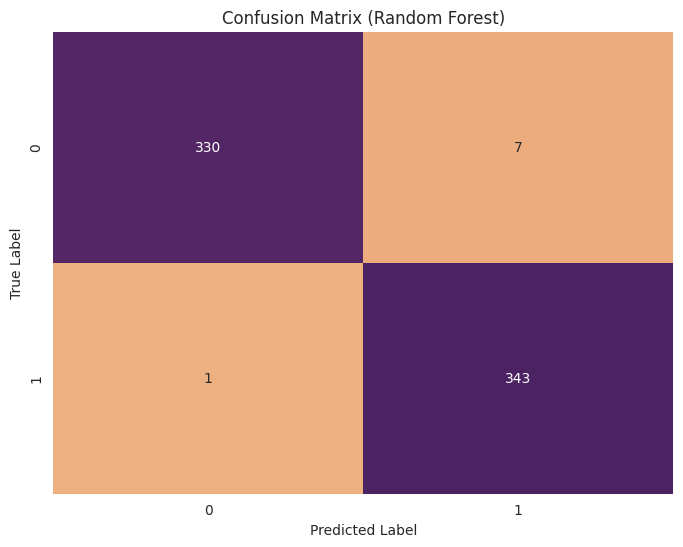

In [ ]:
# Confusion Matrix Visualization
cm_RF = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='flare', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

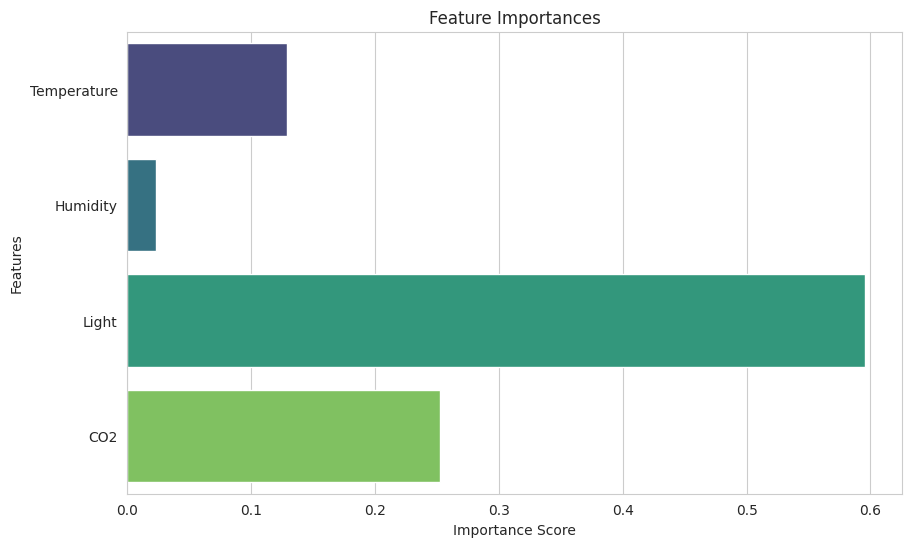

In [ ]:
# Feature Importance Visualization
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Print precision and accuracy
precision = precision_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Precision:", precision)
print("Accuracy:", accuracy)

Precision: 0.98
Accuracy: 0.9882525697503671


# *Visualization*

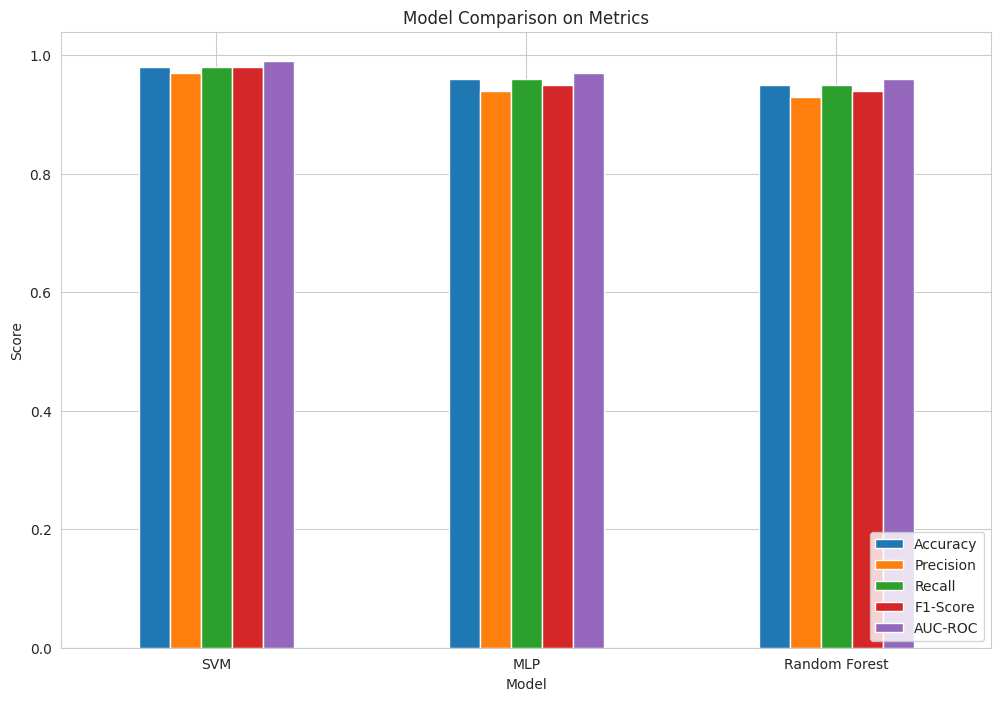

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#  metrics dictionary
model_metrics = {
    "Model": ["SVM", "MLP", "Random Forest"],
    "Accuracy": [0.98, 0.96, 0.95],
    "Precision": [0.97, 0.94, 0.93],
    "Recall": [0.98, 0.96, 0.95],
    "F1-Score": [0.98, 0.95, 0.94],
    "AUC-ROC": [0.99, 0.97, 0.96],
}

metrics_df = pd.DataFrame(model_metrics)

# Bar plot
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 8))
plt.title("Model Comparison on Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
